In [105]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


In [194]:
df = pd.read_csv('datawithnewcols.csv',index_col = 0)

In [219]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,long,sqft_living15,sqft_lot15,Age_of_House,Years_last_renovation,basement,distance_from_city,distance_from_airport,sqft_living_comparison,sqft_lot_comparison
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,True,0.0,...,-122.257,1340,5650,65,65,False,12.251612,8.232375,0.880597,1.000000
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,False,0.0,...,-122.319,1690,7639,69,29,True,12.613856,30.859494,1.520710,0.948030
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,False,0.0,...,-122.233,2720,8062,87,87,False,16.333282,33.112379,0.283088,1.240387
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,False,0.0,...,-122.393,1360,5000,55,55,True,10.617501,10.988905,1.441176,1.000000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,False,0.0,...,-122.045,1800,7503,33,33,False,21.759524,27.230991,0.933333,1.076903


In [243]:
df.corr()['price']

id                       -0.016772
price                     1.000000
bedrooms                  0.308787
bathrooms                 0.525906
sqft_living               0.701917
sqft_lot                  0.089876
floors                    0.256804
waterfront                0.057305
view                      0.393497
condition                 0.036056
grade                     0.667951
sqft_above                0.605368
sqft_basement             0.321108
yr_built                  0.053953
yr_renovated              0.097541
zipcode                  -0.053402
lat                       0.306692
long                      0.022036
sqft_living15             0.585241
sqft_lot15                0.082845
Age_of_House             -0.053953
Years_last_renovation    -0.097541
basement                  0.178264
distance_from_city       -0.286476
distance_from_airport     0.158936
sqft_living_comparison    0.301957
sqft_lot_comparison       0.041796
Name: price, dtype: float64

In [108]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Age_of_House',
       'Years_last_renovation', 'basement', 'distance_from_city',
       'distance_from_airport', 'sqft_living_comparison',
       'sqft_lot_comparison'],
      dtype='object')

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 28 columns):
id                        21597 non-null int64
date                      21597 non-null object
price                     21597 non-null float64
bedrooms                  21597 non-null int64
bathrooms                 21597 non-null float64
sqft_living               21597 non-null int64
sqft_lot                  21597 non-null int64
floors                    21597 non-null float64
waterfront                21597 non-null bool
view                      21597 non-null float64
condition                 21597 non-null int64
grade                     21597 non-null int64
sqft_above                21597 non-null int64
sqft_basement             21597 non-null float64
yr_built                  21597 non-null int64
yr_renovated              21597 non-null int64
zipcode                   21597 non-null int64
lat                       21597 non-null float64
long                      21597 n

In [110]:
df.drop(columns = ['lat','long','yr_built','yr_renovated','sqft_above','sqft_basement'],axis = 1, inplace = True)

In [111]:
# Explore it
numerical_cols = []
for col in df.columns:
    if df[col].dtype in [np.int64, np.float64]:
        numerical_cols.append(col)

len(numerical_cols), numerical_cols

(19,
 ['id',
  'price',
  'bedrooms',
  'bathrooms',
  'sqft_living',
  'sqft_lot',
  'floors',
  'view',
  'condition',
  'grade',
  'zipcode',
  'sqft_living15',
  'sqft_lot15',
  'Age_of_House',
  'Years_last_renovation',
  'distance_from_city',
  'distance_from_airport',
  'sqft_living_comparison',
  'sqft_lot_comparison'])

In [112]:
numerical_cols.remove('id')

In [113]:
numerical_cols

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'view',
 'condition',
 'grade',
 'zipcode',
 'sqft_living15',
 'sqft_lot15',
 'Age_of_House',
 'Years_last_renovation',
 'distance_from_city',
 'distance_from_airport',
 'sqft_living_comparison',
 'sqft_lot_comparison']

In [114]:
numericals = numerical_cols.remove('price')

# SalesPrice Distribution


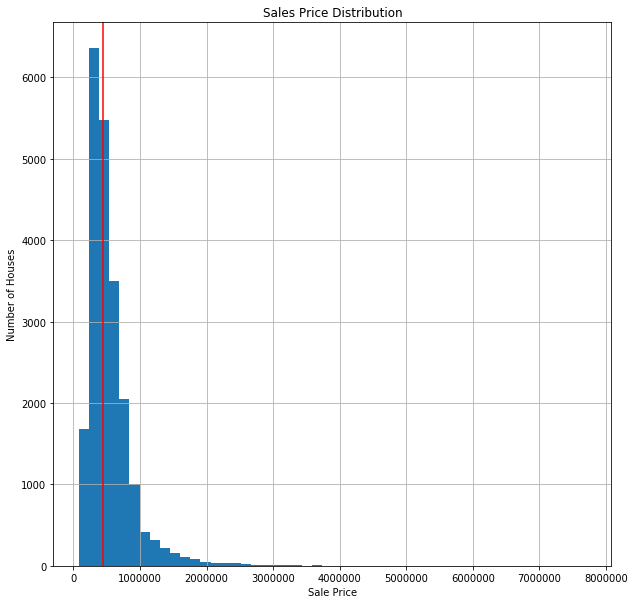

In [167]:

salesprice = df["price"]
salesprice.hist(figsize=(10,10),bins = 50);
plt.title("Sales Price Distribution");
plt.xlabel("Sale Price");
plt.ylabel("Number of Houses");
plt.axvline(salesprice.median(), color = 'red');

# Home Value over the Decades

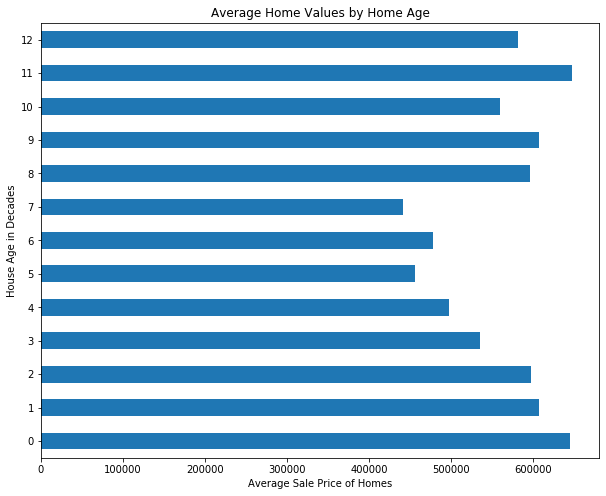

In [151]:

df['decades'] = df['Age_of_House']//10
to_plot = df.groupby('decades')['price'].mean()
to_plot.plot(kind='barh', figsize=(10,8))
plt.ylabel('House Age in Decades')
plt.xlabel('Average Sale Price of Homes')
plt.title('Average Home Values by Home Age');


 # Price by Condition

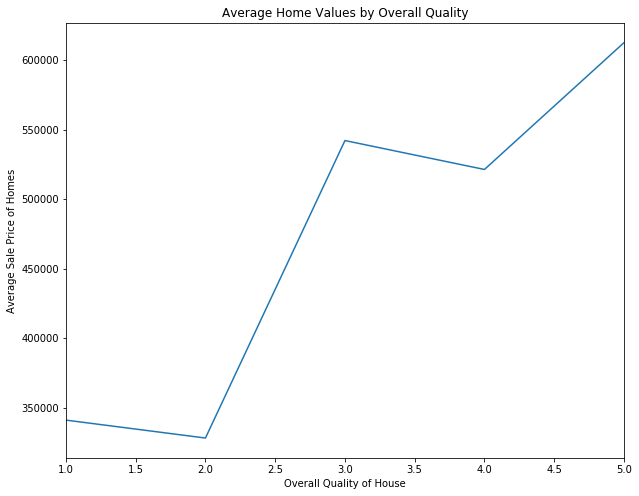

In [178]:
to_plot1 = df.groupby('condition').price.mean()
to_plot1.plot(kind='line', figsize=(10,8))

plt.xlabel('Overall Quality of House')
plt.ylabel('Average Sale Price of Homes')
plt.title('Average Home Values by Overall Quality');

# House Size vs Price with Basement Hue

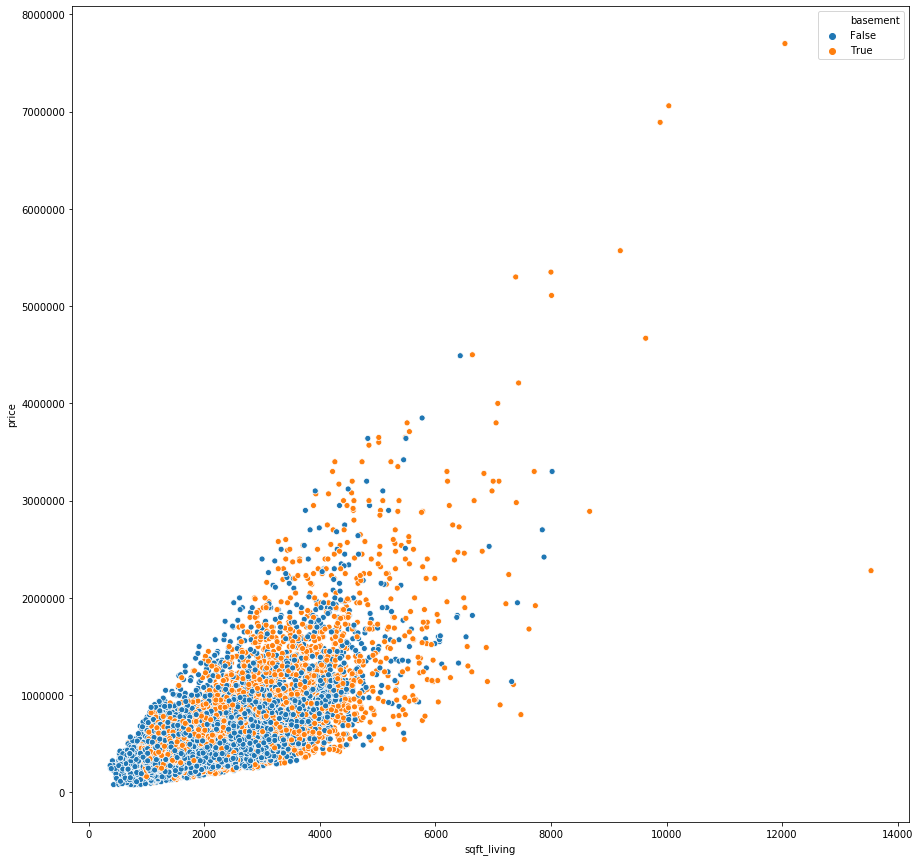

In [185]:
plt.figure(figsize= (15,15))
sns.scatterplot(x='sqft_living', y='price',data=df,hue = 'basement')
plt.show()

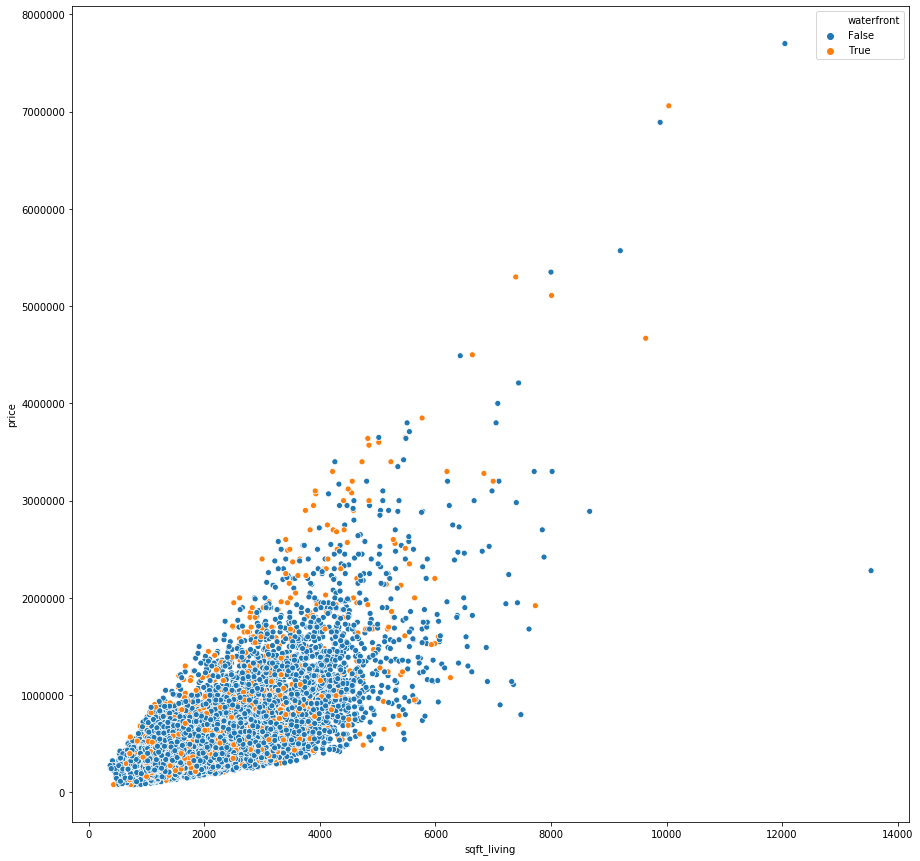

In [192]:
plt.figure(figsize= (15,15))
sns.scatterplot(x='sqft_living', y='price',data=df,hue = 'waterfront')
plt.show()

# Distance From City (Seattle) vs House Price

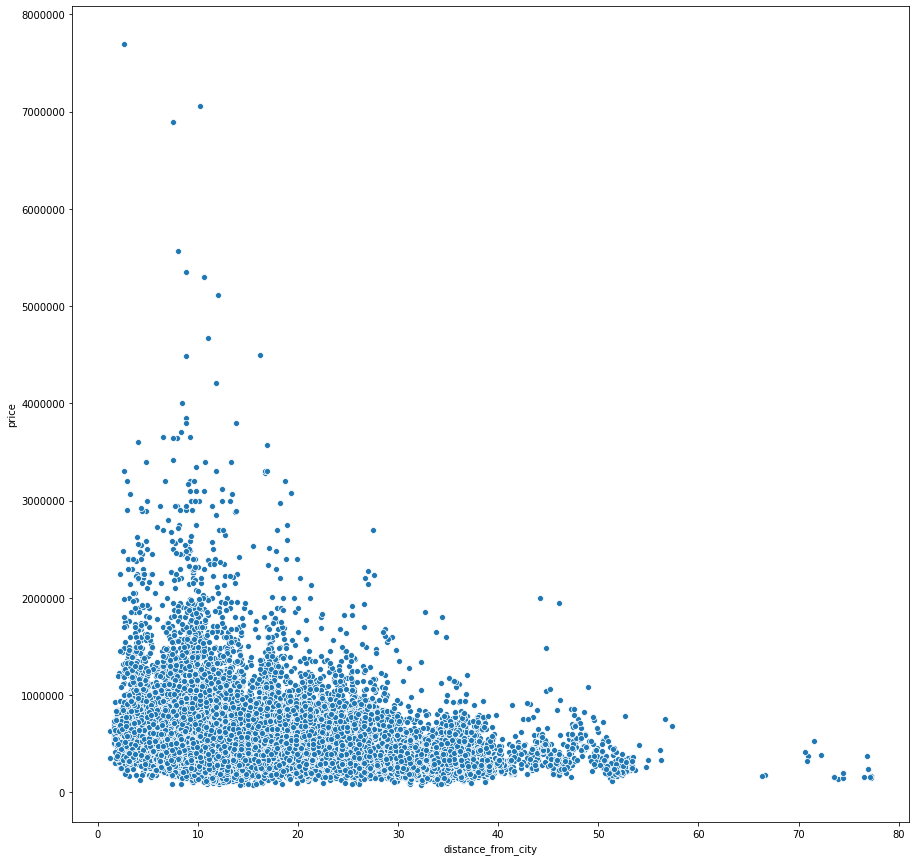

In [245]:
plt.figure(figsize= (15,15))
sns.scatterplot(x='distance_from_city', y='price',data=df)
plt.show()

# Distance From International Airport vs House Price


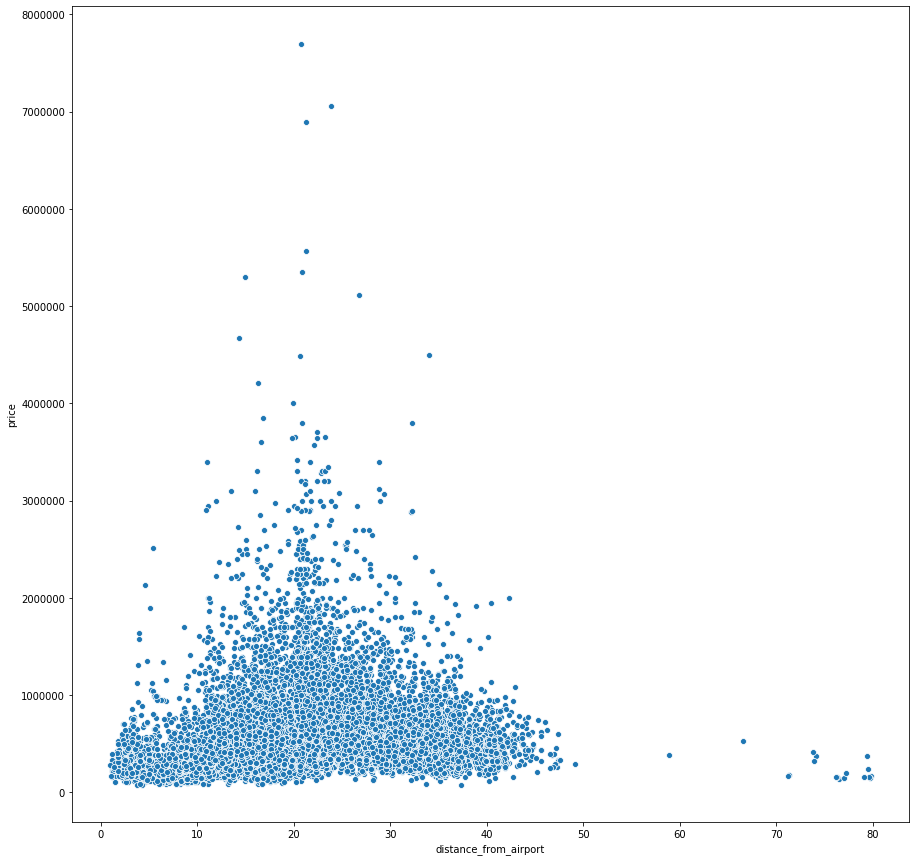

In [189]:
plt.figure(figsize= (15,15))
sns.scatterplot(x='distance_from_airport', y='price',data=df)
plt.show()

**The house prices are cheapest from 0 -10km, then increase from 10 to 30 before decreasing again**

This is as expected
* Too close to aiport and noise drives prices down
* Too far from aiport - 30+km also drive down price
* Sweet spot seems to be between 10 and 30 km

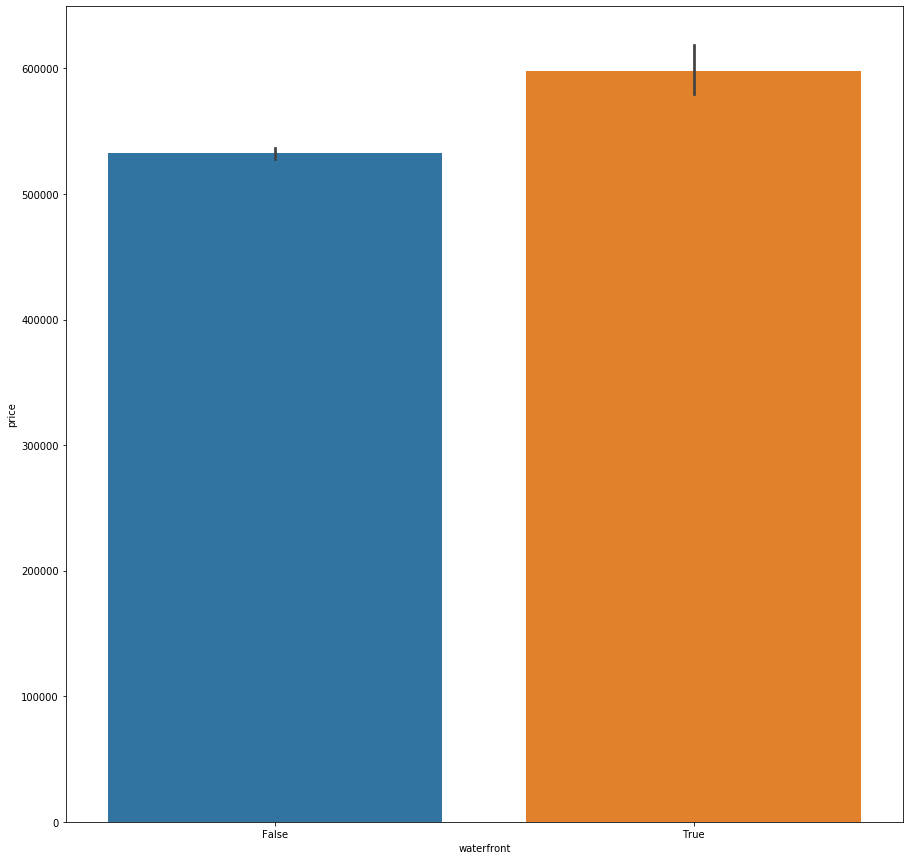

In [247]:
plt.figure(figsize= (15,15))
sns.barplot(x='waterfront', y='price',data=df)
plt.show()

# Age of House vs Price

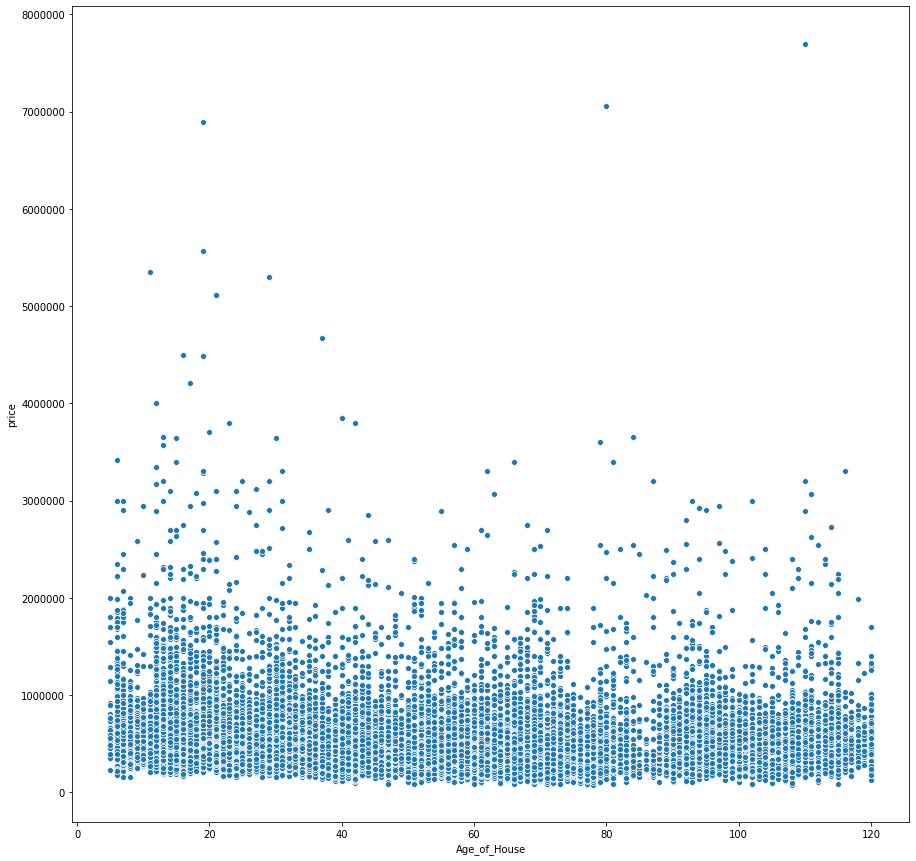

In [197]:
plt.figure(figsize= (15,15))
sns.scatterplot(x='Age_of_House', y='price',data=df)
plt.show()

# Last Renovated vs House Price

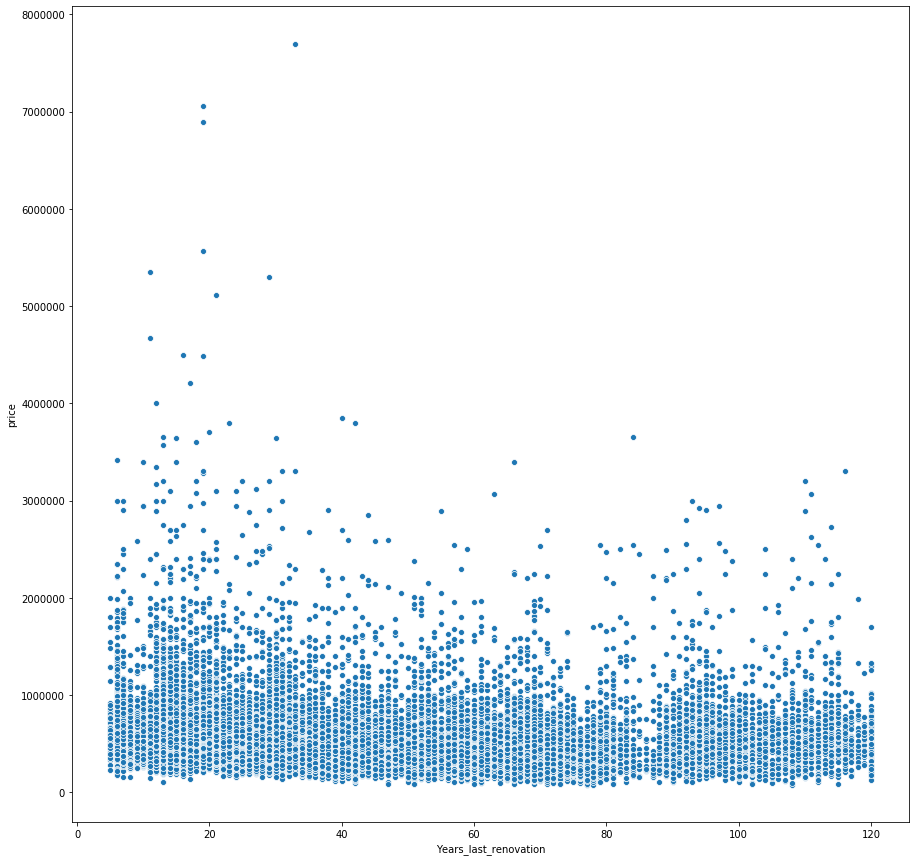

In [198]:
plt.figure(figsize= (15,15))
sns.scatterplot(x='Years_last_renovation', y='price',data=df)
plt.show()

# 10 Cheapest Zipcodes by House Price

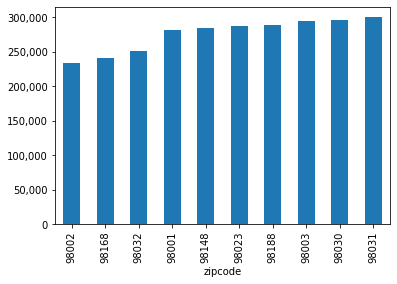

In [206]:
ax = df.groupby('zipcode')['price'].mean().sort_values(ascending = True)[:10].plot(kind='bar')

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

# 10 Expensive Zipcodes by House Price

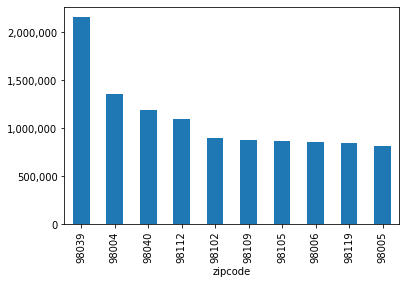

In [207]:
ax = df.groupby('zipcode')['price'].mean().sort_values(ascending = False)[:10].plot(kind='bar')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

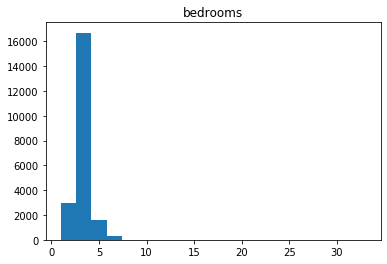

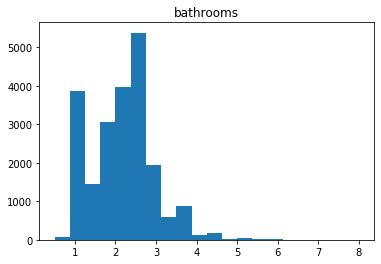

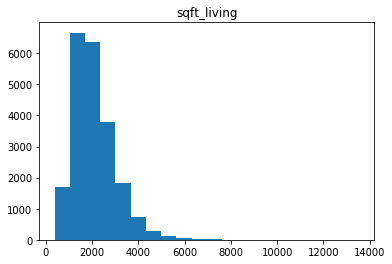

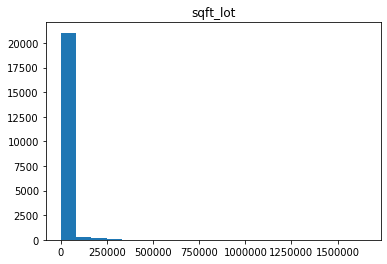

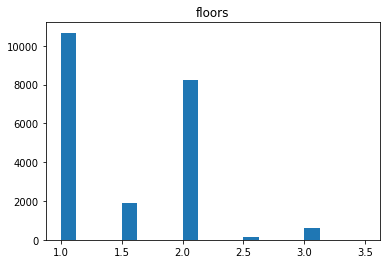

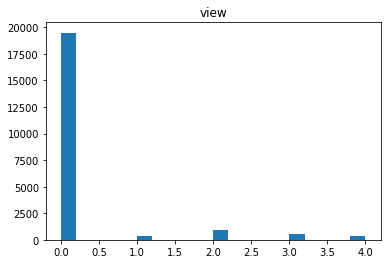

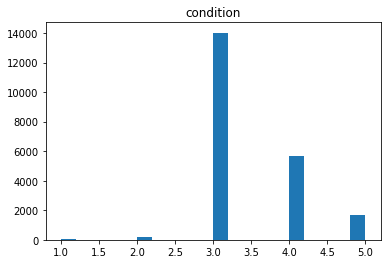

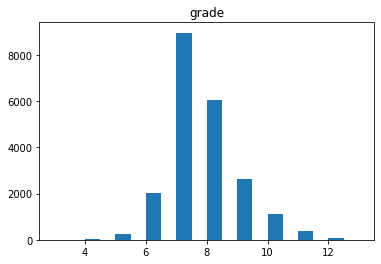

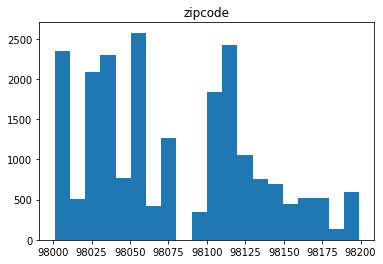

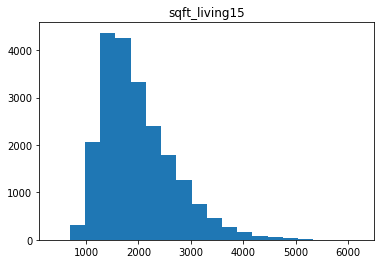

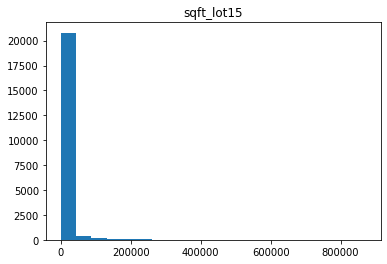

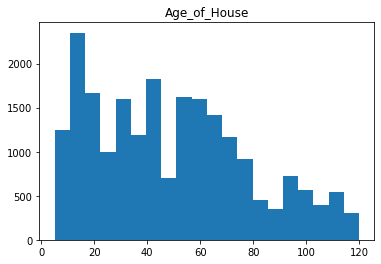

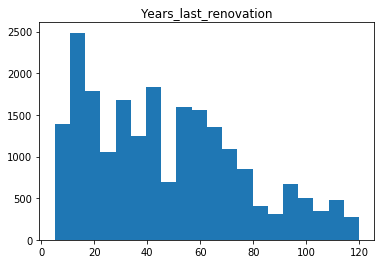

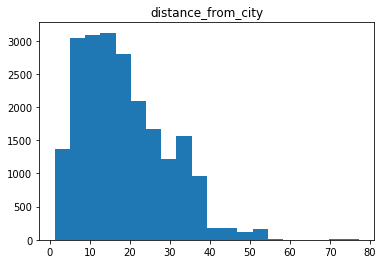

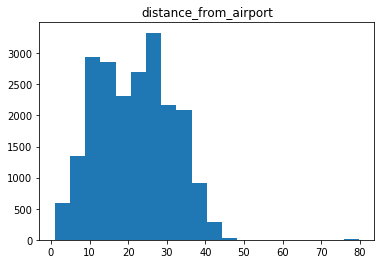

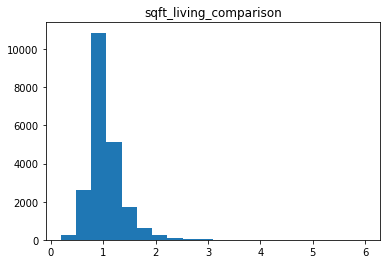

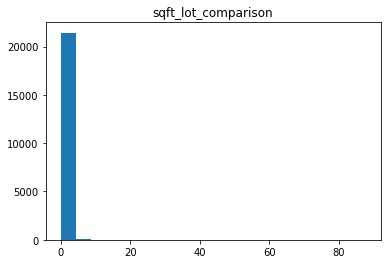

In [210]:
for col in numerical_cols:
    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.show()


**From the above histogram can see a view of the columns should be categorical**

In [116]:
categoricals = ['floors','view','condition','grade','waterfront','basement','zipcode']

# Viewing Categorical Variables

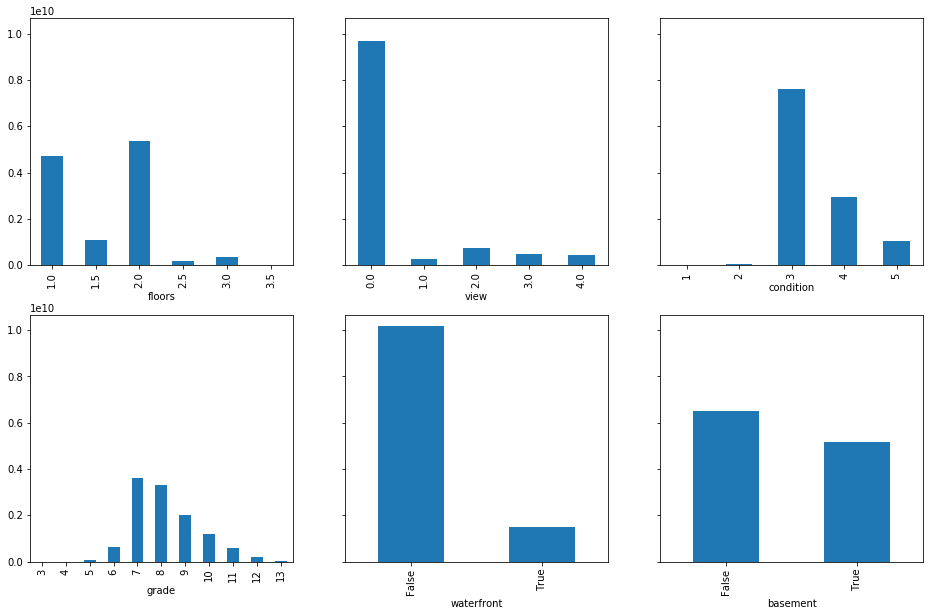

In [172]:

# Create bar plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,10), sharey=True)
for xcol, ax in zip(categoricals, axes.flatten()):
    df.groupby(xcol)['price'].sum().plot(kind='bar',ax=ax)
#     df.groupby(xcol)['price'].mean().plot(kind='bar',ax=ax,)


In [169]:
# PLotting ZIpcodes by price

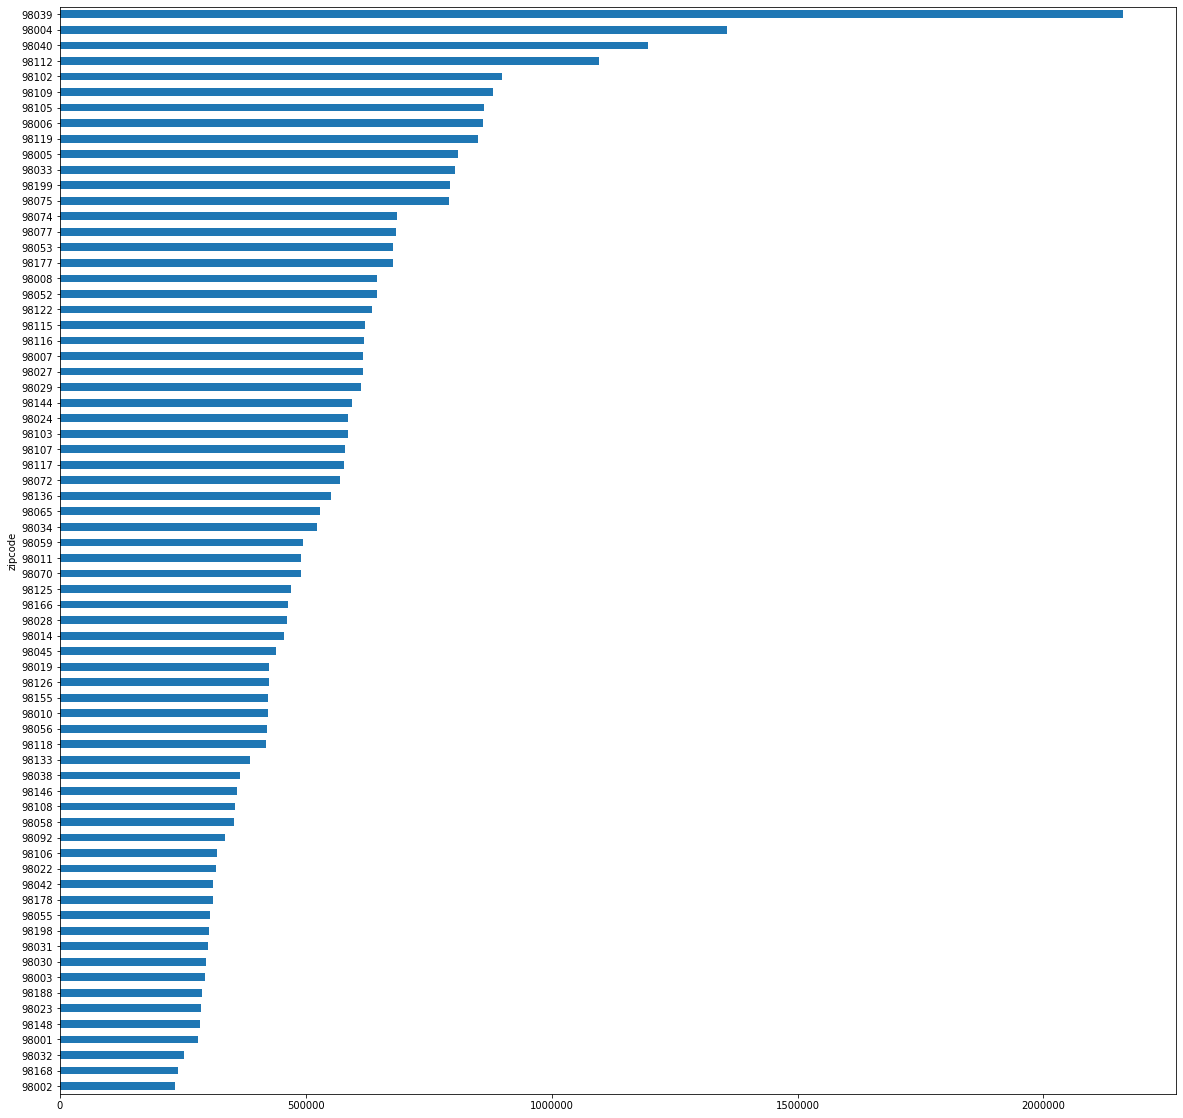

In [118]:
plt.figure(figsize=(20,20))
df.groupby('zipcode')['price'].mean().sort_values().plot(kind='barh')

In [119]:
df['waterfront'].value_counts()

False    19075
True      2522
Name: waterfront, dtype: int64

In [120]:
numericals = ['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_living15',
 'sqft_lot15',
 'Age_of_House',
 'Years_last_renovation',
 'distance_from_city',
 'distance_from_airport',
 'sqft_living_comparison',
 'sqft_lot_comparison']

# Correlation between Variables

In [121]:
corr = df[numericals].corr()

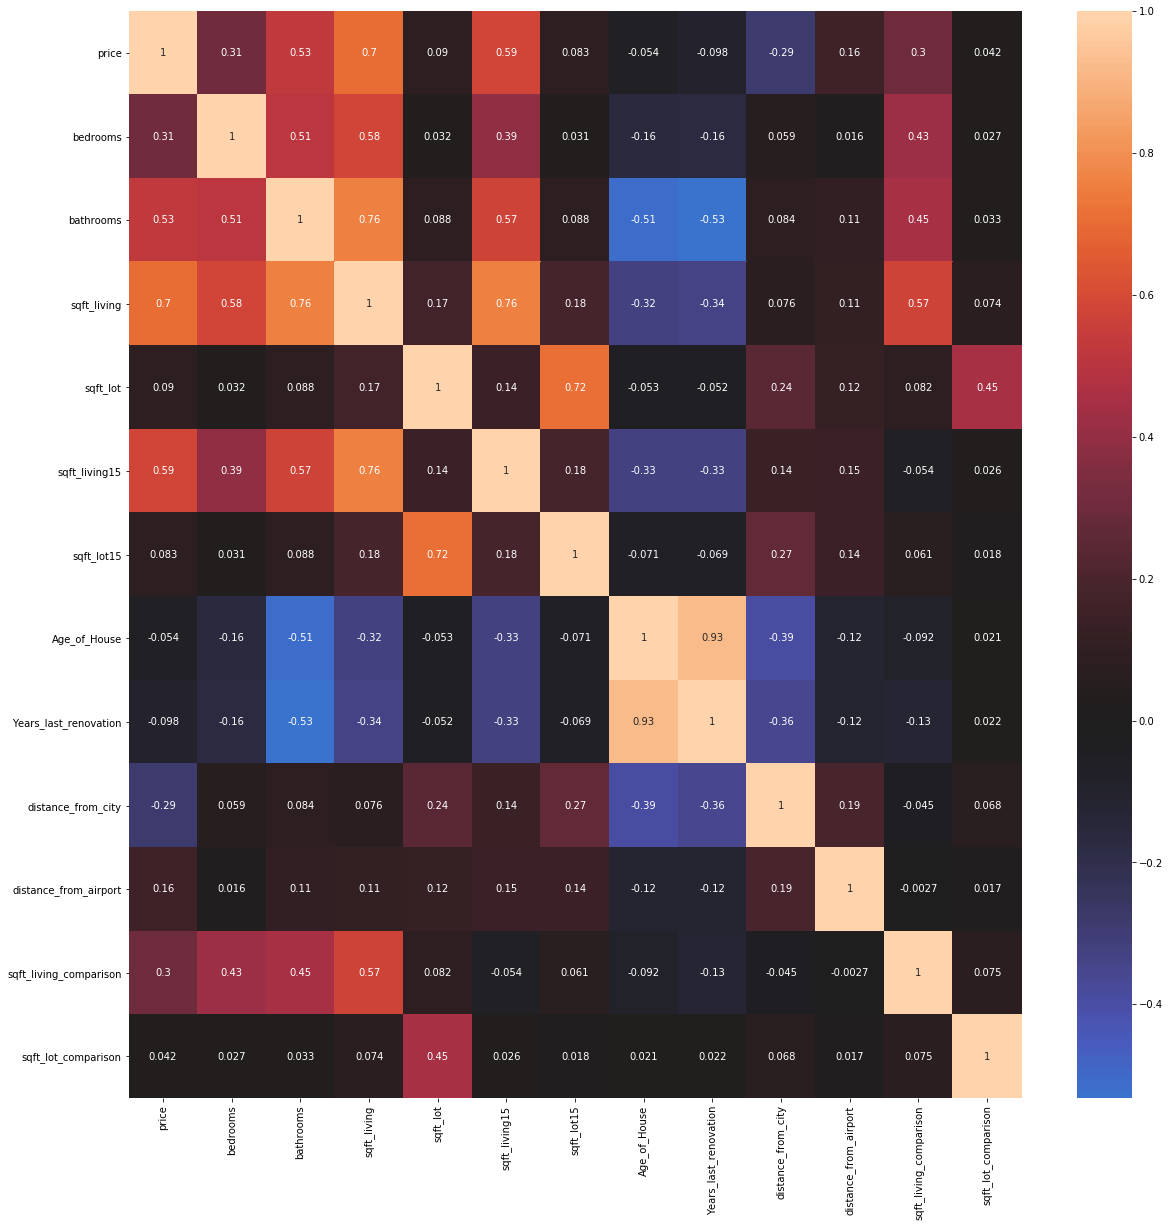

In [122]:
# Your code here
plt.figure(figsize=(20,20))
sns.heatmap(corr, center=0, annot=True);
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

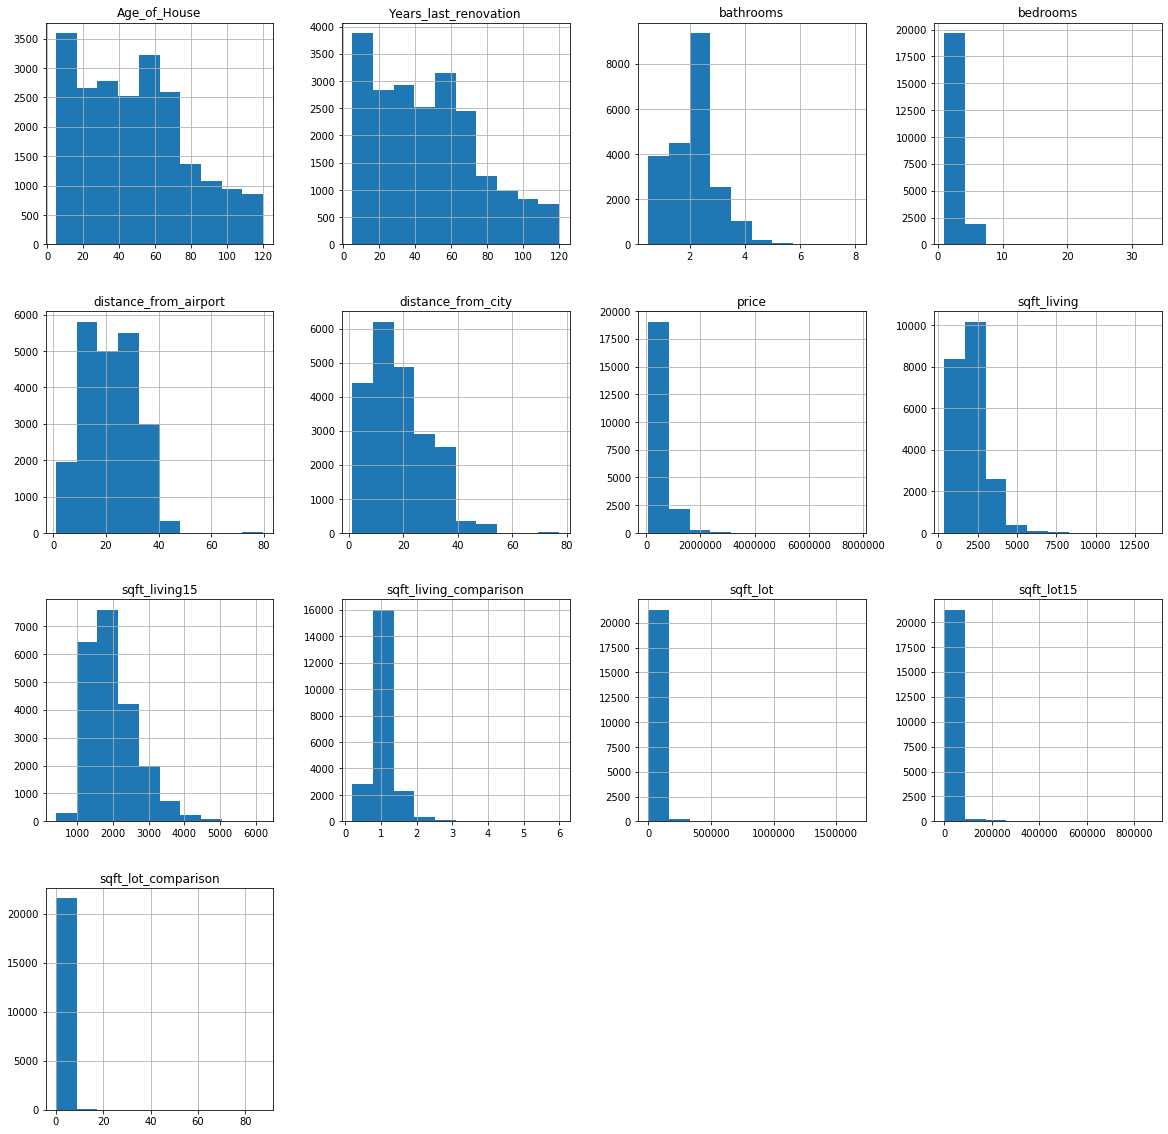

In [123]:
df_cont = df[numericals]
df_cont.head()
df_cont.hist(figsize = (20,20))
plt.show()

In [124]:
totransform = ['bathrooms','bedrooms','distance_from_city','sqft_living','sqft_living15','sqft_living_comparison',
             'sqft_lot','sqft_lot15','sqft_lot_comparison']
df_transform = df[totransform]


In [174]:
numericals.remove('price')

In [175]:
numericals

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_living15',
 'sqft_lot15',
 'Age_of_House',
 'Years_last_renovation',
 'distance_from_city',
 'distance_from_airport',
 'sqft_living_comparison',
 'sqft_lot_comparison']

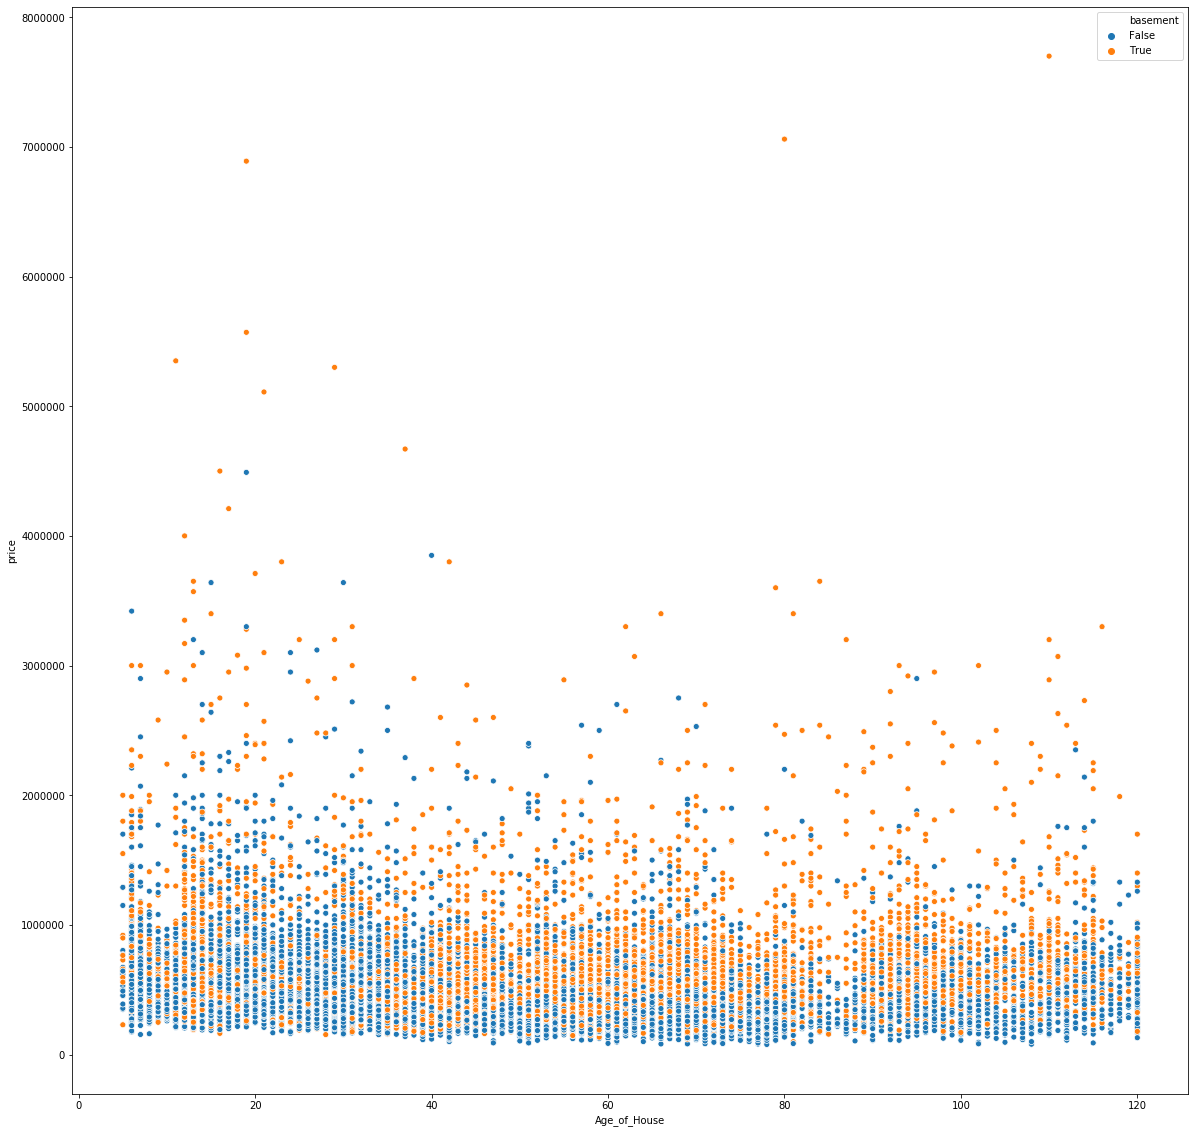

In [144]:
plt.figure(figsize=(20,20))
sns.scatterplot(y='price',x='Age_of_House',data=df,hue='basement')

In [141]:
dftop1000 = df.sort_values(by='price',ascending = False)[:1000]

In [60]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

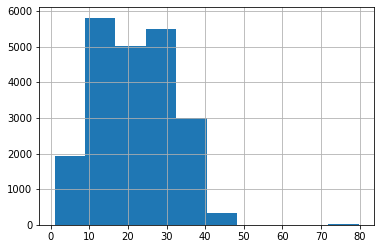

In [62]:
df['distance_from_airport'].hist()

In [63]:
airport = df['distance_from_airport']

In [29]:
bc_airport = scs.boxcox(airport.values)
bc_aiport

(array([ 5.06927218, 15.68941097, 16.59977516, ...,  9.5067996 ,
        11.10214205,  9.49084707]), 0.7384956043313035)

In [30]:
bc_airport.hist()
plt.show()

AttributeError: 'tuple' object has no attribute 'hist'

In [31]:
df['distance_from_airport']

0         8.232375
1        30.859494
2        33.112379
3        10.988905
4        27.230991
           ...    
21592    28.614456
21593     8.730896
21594    16.764856
21595    20.183559
21596    16.731520
Name: distance_from_airport, Length: 21597, dtype: float64

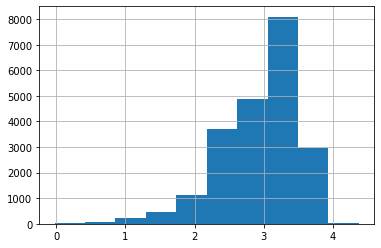

In [13]:
df['log_dist_from_airport'].hist()

In [237]:

dfzip = df.groupby('zipcode')['price'].agg(['mean','median','count'])

In [238]:
dfzip.reset_index(inplace = True)

In [239]:
dfzip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 4 columns):
zipcode    70 non-null int64
mean       70 non-null float64
median     70 non-null float64
count      70 non-null int64
dtypes: float64(2), int64(2)
memory usage: 2.3 KB


In [240]:
dfzip['mean'] = dfzip['mean'].astype('int64')
dfzip['median'] = dfzip['median'].astype('int64')

In [242]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,long,sqft_living15,sqft_lot15,Age_of_House,Years_last_renovation,basement,distance_from_city,distance_from_airport,sqft_living_comparison,sqft_lot_comparison
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.012311,0.011772,-0.023803,...,0.020672,-0.002701,-0.138557,-0.021617,-0.020022,0.003495,0.005390,0.013908,-0.015351,-0.049553
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.057305,0.393497,0.036056,...,0.022036,0.585241,0.082845,-0.053953,-0.097541,0.178264,-0.286476,0.158936,0.301957,0.041796
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.004858,0.078354,0.026496,...,0.132054,0.393406,0.030690,-0.155670,-0.164392,0.158412,0.059071,0.016088,0.427552,0.026639
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.011744,0.186016,-0.126479,...,0.224903,0.569884,0.088303,-0.507173,-0.532389,0.159863,0.083960,0.107803,0.454587,0.033166
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.020362,0.281715,-0.059445,...,0.241214,0.756402,0.184342,-0.318152,-0.339146,0.201198,0.075776,0.111641,0.569819,0.074290
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.007191,0.075054,-0.008830,...,0.230227,0.144763,0.718204,-0.052946,-0.051870,-0.034889,0.242779,0.124300,0.082075,0.452981
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.000505,0.028414,-0.264075,...,0.125943,0.280102,-0.010722,-0.489193,-0.500721,-0.252465,0.003009,0.111290,0.202743,-0.022602
waterfront,-0.012311,0.057305,-0.004858,0.011744,0.020362,0.007191,0.000505,1.000000,0.107270,0.003639,...,-0.008420,0.018332,0.002904,0.010033,0.003206,0.010897,-0.005786,-0.012765,0.006795,-0.001953
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.107270,1.000000,0.045622,...,-0.077702,0.278928,0.073083,0.054452,0.026631,0.176905,-0.075245,-0.040627,0.073946,0.019677
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.003639,0.045622,1.000000,...,-0.105877,-0.093072,-0.003126,0.361592,0.390264,0.130542,-0.073138,-0.061376,0.028978,-0.016706


In [236]:
dfzip

,zipcode,sum,count
0,98001,101511348,361
1,98002,46622523,199
2,98003,82351158,280
3,98004,430018105,317
4,98005,136128669,168
...,...,...,...
65,98177,172486945,255
66,98178,81380542,262
67,98188,39314655,136
68,98198,84811087,280


# Linearity

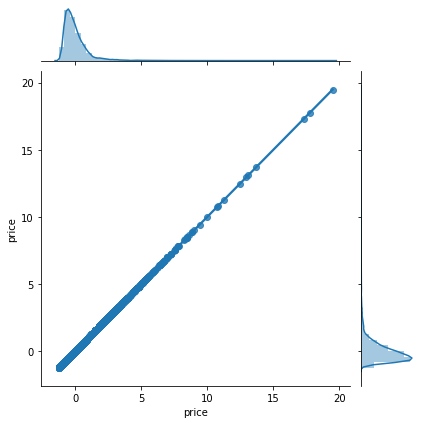

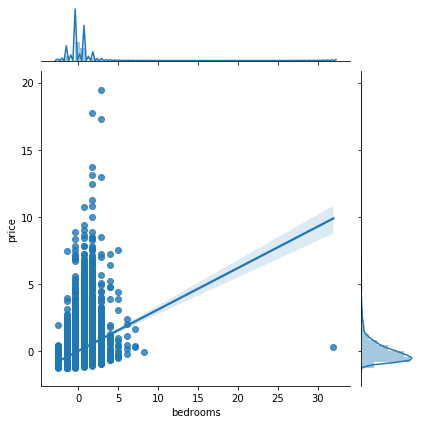

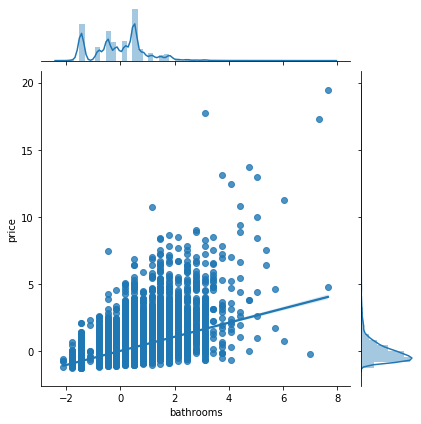

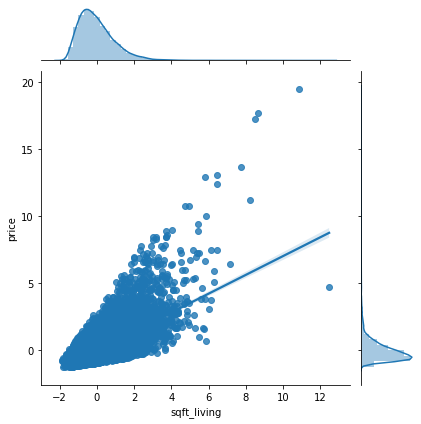

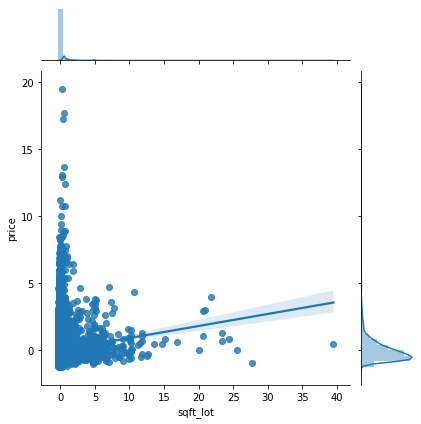

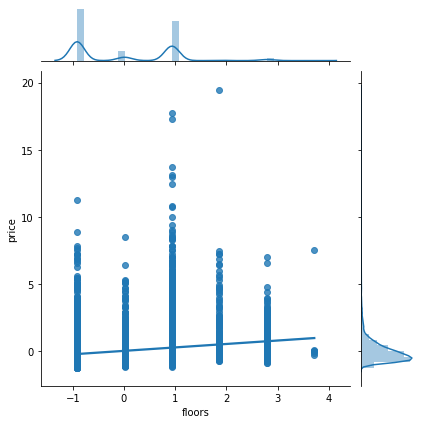

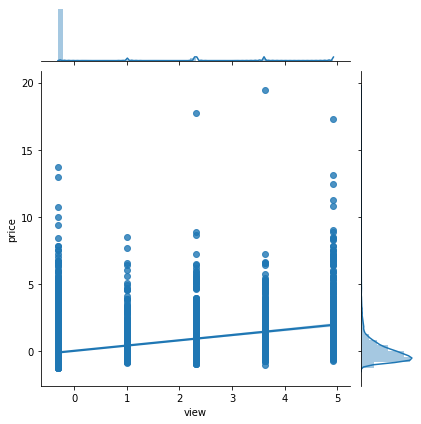

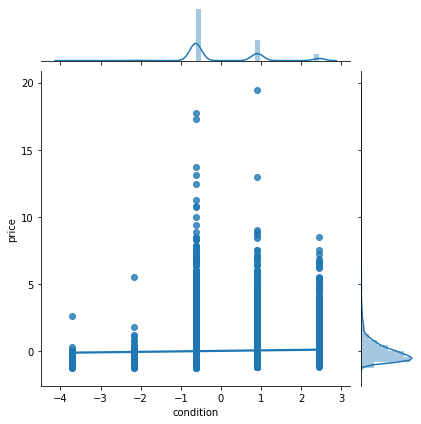

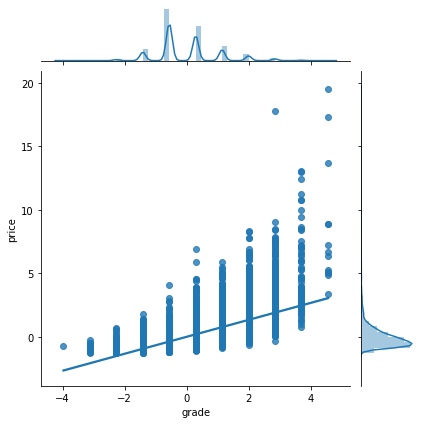

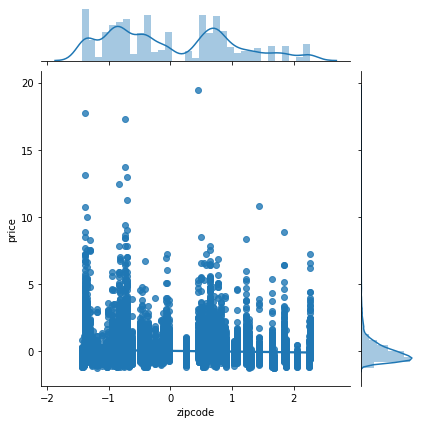

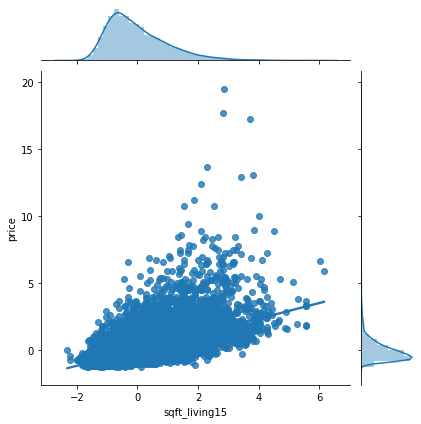

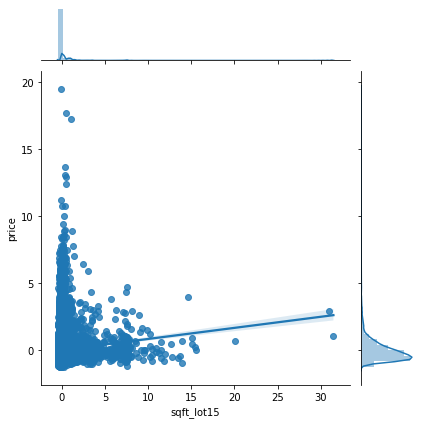

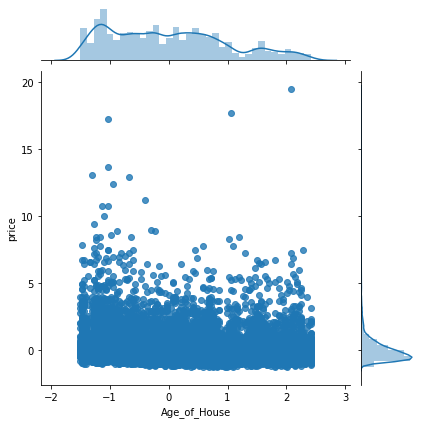

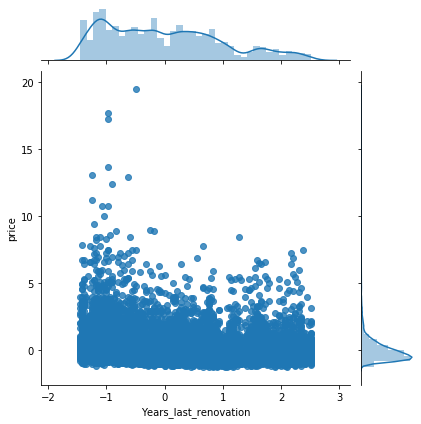

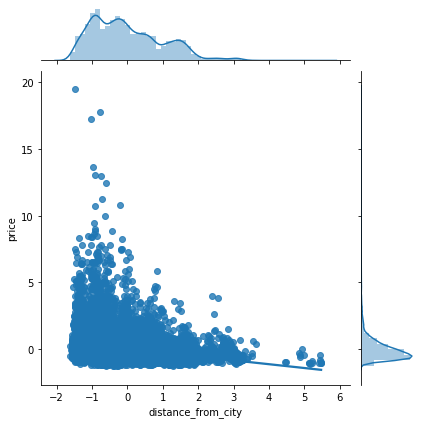

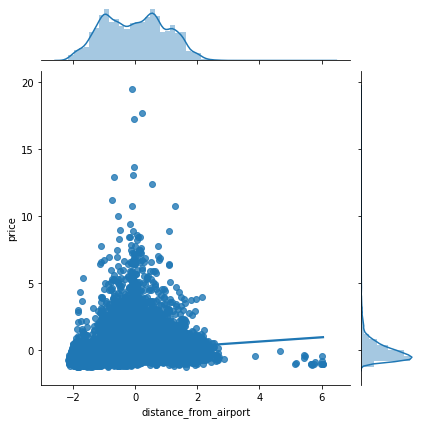

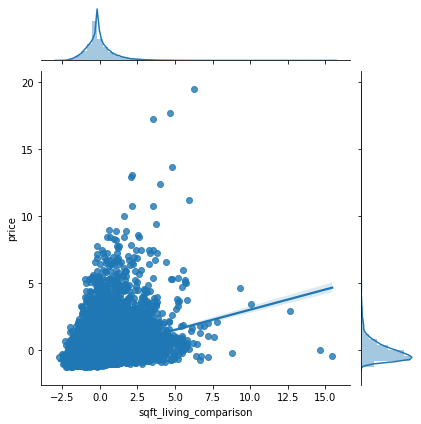

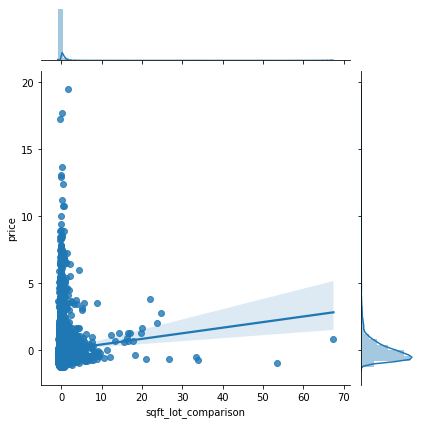

In [68]:
for col in numerical_cols:
    sns.jointplot(x = col,y ='price',data=df, kind='reg')